In [3]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 #Number of words to consider as features
max_len = 20  #Truncates the text after this number of words (among the max_features most common words)
embedding_dim = 8

#Load data as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

#Turn the lists of integers into a 2D integer tensor of shape (samples, maxlen)
#Sequences that are shorter than max_len are padded with 0.0
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = max_len, value = 0.0)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen = max_len, value = 0.0) 

In [13]:
#STEP: Using an Embedding layer and classifier on the IMDB data

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras import optimizers
from keras import losses
from keras import metrics

model = Sequential()
#Specifies the maximum input length to the Embedding layer 
#so you can later flatten the embedded inputs. After the 
#Embedding layer, the activations have shape (samples, maxlen, 8)
model.add(Embedding(max_features, embedding_dim, input_length = max_len))

#Flattens the 3D tensor of embeddings into a 2D tensor of shape (samples, maxlen * 8)
model.add(Flatten())

#Add the classifier on top
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

# Param numbers 80000 = max_features * embedding_dim
# Output shape 160 = max_len * embedding_dim
# Param numbers 161 = max_len * embedding_dim + shape of Dense layer
model.summary()

history_wem = model.fit(x_train, y_train,
                       epochs = 10,
                       batch_size = 32,
                       validation_split = 0.2) #Total sample 25,000; validation = 25000 * 0.2 = 5,000

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_7 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 46us/step - loss: 0.6655 - binary_accuracy: 0.6289 - val_loss: 0.6098 - val_binary_accuracy: 0.6984
Epoch 2/10
20000/20000 [==============================] - 1s 35us/step - loss: 0.5347 - binary_accuracy: 0.7511 - val_loss: 0.5220 - val_binary_accuracy: 0.7382
Epoch 3/10
20000/20000 [=======

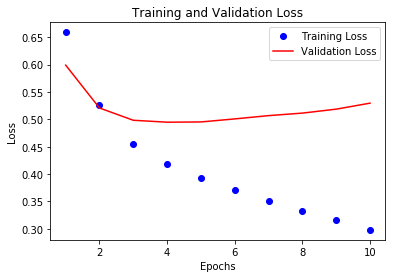

In [10]:
#STEP: Plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history_wem.history['loss']
val_loss = history_wem.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

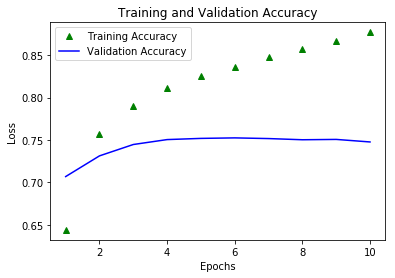

In [11]:
#STEP: Plotting training and validation accuracy

acc =  history_wem.history['binary_accuracy']
val_acc = history_wem.history['val_binary_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g^', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()